## Algunos ejemplos de funciones que trabajan con imágenes


Como comenzamos a ver en el documento anterior, estamos utilizando imágenes a través del paquete Python Imaging Library (PIL).


In [1]:
from PIL import Image

En estos apuntes, vamos a hacer algunos ejemplos de funciones algo más sofisticadas que hagan recorridos y transformaciones de imágenes. 

### Menor y mayor valor de una imagen

Una función sencilla y, a la vez, útil, es la que busca el *menor* valor de los píxeles de la imagen. Veamos un ejemplo. Considera esta imagen: (puedes conseguirla en <a href='http://wild.mat.ucm.es/img/tesla_bw.png'>http://wild.mat.ucm.es/img/tesla_bw.png</a>)

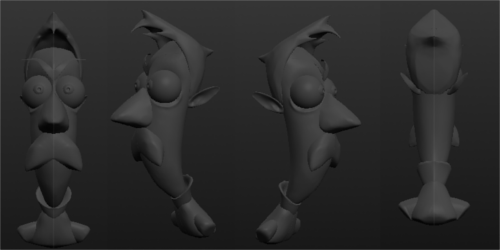

In [28]:
i = Image.open('img/tesla_bw.png','r')
i

Vamos a ver algo de información de la imagen utilizando lo que ya vimos en el documento anterior.


In [4]:
i.size, i.format_description, i.getbands()

((500, 250), 'Portable network graphics', ('L',))

Es una imagen en escala de grises 'L' con formato .png y con resolución 500x250 píxeles.


Vamos a definir una función que nos permita encontar el valor más bajo de los píxeles que forman la imagen. Como en este ejemplo estamos considerando escala de grises, es bastante fácil.

In [13]:
def min_value(img):
    """
    Return the min value of the image pixels for a black and white image.
    
    @type img: PIL.Image
    @rtype:    int  #0..255 
    """
    width, height = img.size
    candidate = 255
    for x in range(width):
        for y in range(height):
            pix_value = img.getpixel((x,y))
            if pix_value < candidate:
                candidate = pix_value
    return candidate

In [14]:
min(i)

3

Es decir, el valor más pequeño que hemos encontrado ha sido 3. No hay píxeles en la imagen con valores por debajo de 3. De igual forma, podríaos definir la función `max(img)`:

In [26]:
def max_value(img):
    """
    Return the max value of the image pixels for a black and white image.
    
    @type img: PIL.Image
    @rtype:    int  #0..255 
    """
    width, height = img.size
    candidate = 0
    for x in range(width):
        for y in range(height):
            pix_value = img.getpixel((x,y))
            if pix_value > candidate:
                candidate = pix_value
    return candidate

In [29]:
max(i)

104

En este ejemplo concreto, el valor más alto de la imagen es 104, muy lejos del 255 que es el valor máximo posible que corresponde al blanco. 

Como puedes ver, tanto la función `min()` como `max()` responden perfectamente a un esquema de *recorrido*: pasamos por todos y cada uno de los píxeles de la imagen para ver cúal es más pequeño o más grande. 

Dado que el rango es limitado (0..255), estos recorridos pueden convertirse en búsquedas. Si queremos saber cuál es el mínimo y ya tenemos 0, no vamos a encontrar uno menor. De igual forma, si queremos saber el máximo valor y, en algún punto intermedio del recorrido, ya hemos encontrado 255, no necesitamos seguir.

Una vez que sabemos los valores mínimos y máximos podemos maximizar el contraste y la imagen ganará en claridad. Este es uno de los efectos básicos para mejorar la calidad de las fotografías digitales. Funciones tan simples como ésta es la que hacen la magia de los retoques fotográficos.

In [31]:
def max_contrast(img):
    """
    This function maximizes the contrast of a black and white image.
    @type img: PIL.image
    """
    minv = min_value(img)
    maxv = max_value(img)
    width, height = img.size
    for x in range(width):
        for y in range(height):
            pixv = img.getpixel((x,y))
            newv = int(255 * (pixv-minv) / (maxv-minv))
            new_value = ( newv ) 
            img.putpixel((x,y), new_value)



0 255


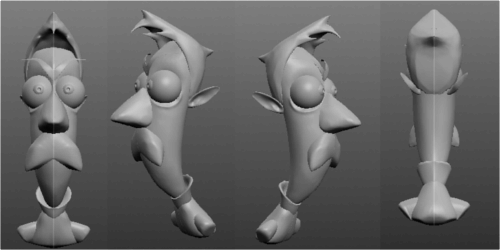

In [32]:
i = Image.open('img/tesla_bw.png','r')          
max_contrast(i)
print(min(i), max(i))
i


###Threshold (umbral)

Para el procesamiento de imágenes también se utiliza mucho la función que decide qué píxeles están por debajo (o por encima) de un determinado umbral. 

Imagina que deseamos cambiar el color de fondo de esta imagen para probar cómo quedaría.

<center> <img width="200" src='files/img/numbers.png'><img src='files/img/right.gif'><img width="200" src='files/img/numbers_threshold-80.png'> </center>

De momento, por sencillez, vamos comenzar por definir la función para imágenes definidas en escala de grises.

In [33]:
def threshold_grey(img, value):
    """
    Returns a list with coordinates of the pixels in 'img' above 'value'
    
    @type img: PIL.Image # gray scale
    @type value: int     # 0..255
    """
    width, height = img.size
    result = []
    for x in range(width):
        for y in range(height):
            if img.getpixel((x,y)) < value:
               result.append((x,y))
    return result

Es fácil ver que esta función es un *recorrido* y en particular, un filtro. En cada píxel verificamos la propiedad de ser mayor que `valor` y en caso afirmativo añadimos el píxel a los resultados.

Veámos cómo sería trabajar con una imagen en color. La única diferencia es en la expresión que utilizamos
como filtro. Ahora tiene que tener en cuenta los tres canales de la imagen: rojo, verde y azul.

In [34]:
def threshold_color(img, value):
    """
    Returns a list with coordinates of the pixels in 'img' above 'value'
    
    @type img: PIL.Image       # color
    @type value: (int,int,int) # 0..255
    """
    width, height = img.size
    thres_red, thres_green, thres_blue = value
    result = []
    for x in range(width):
        for y in range(height):
            red, green, blue = img.getpixel((x,y))
            if  red < thres_red and \
                green < thres_green and \
                blue < thres_blue:
                   result.append((x,y))
    return result

Observa cómo trabajamos con la terna y también cómo podemos partir líneas largas, como la expresión a evaluar en el filtro, para dar mayor legibilidad al código. 

Vamos a probar la función con la imágen anterior de números (<a href='http://wild.mat.ucm.es/img/numbers.png'>http://wild.mat.ucm.es/img/numbers.png'</a>).

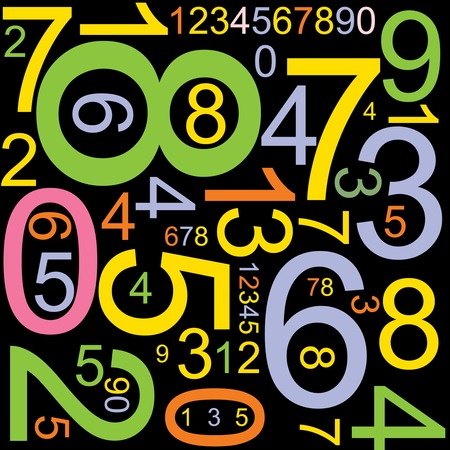

In [36]:
i = Image.open('img/numbers.png','r')
i

In [39]:
l = threshold_color(i,(10,10,10))

Pero `l` es sólo una lista. Para ver cláramente qué estámos filtrando con nuestra función, podemos tranformar los píxeles seleccionados por el threhold.

In [37]:
def give_color(img, pixel_list, color):
    for pix in pixel_list:
        img.putpixel(pix, color)

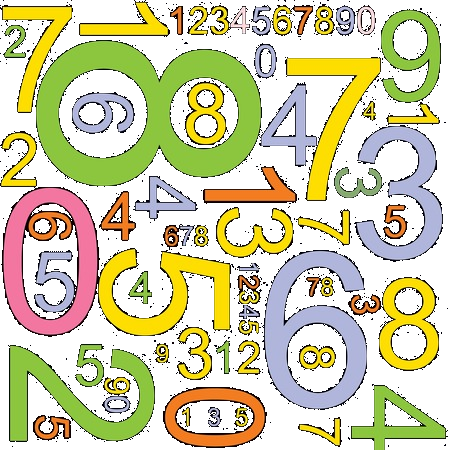

In [41]:
give_color(i, l, (255,255,255))
i

Observa cómo estamos transformando la imagen original, aunque no tendrán efecto en el archivo hasta que no grabemos la imagen. Como aún se ven puntos muy oscuros en el *fondo* de la imagen, podemos probar con otros valores de umbral (threshold) para la función. 

Ya que la imagen que contiene la variable `i` ha sido transformada, es mejor que para probar nuevos valores para la función `threshold_color()` volvamos a leer la imagen original.

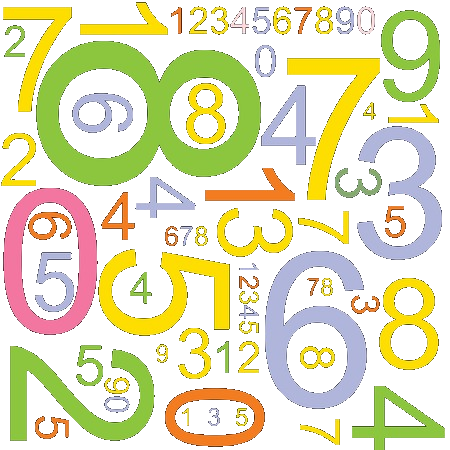

In [43]:
i = Image.open('img/numbers.png','r')
give_color(i, threshold_color(i,(80,80,80)), (255,255,255))
i

<center><img width="200" src='files/img/numbers_threshold-80.png'></center>

Con este nuevo valor, la imagen está mucho más limpia. También podemos probar con otros colores de fondo...

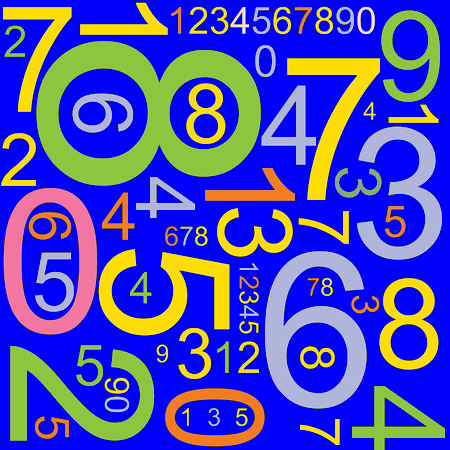

In [44]:
i = Image.open('img/numbers.png','r')
give_color(i, threshold_color(i,(80,80,80)), (0,0,255))
i

##Ejercicios

A continuación te proponemos otros ejercicios, el enunciado es minimalista, te mostramos la imagen original y el resultado de aplicar la función. A veces, ponemos varios resultados para que veas distintas opciones de la función. Inventa tus propias variantes...

####Máscaras
<img width="300" height="225" src='files/img/beach_grey.png'><img src='files/img/right.gif'><img width="300" height="225" src='files/img/beach_mask-150.png'>

####Área de interés
<img width="300" height="225" src='files/img/beach.png'><img src='files/img/right.gif'>
<img width="150" src='files/img/beach_roi-100x100-300x300.png'>
<img width="250" src='files/img/beach_roi-50x50-500x150.png'>

####Thumbnail
<img width="300" height="225" src='files/img/beach.png'><img src='files/img/right.gif'>
<img src='files/img/beach_thumbnail-3.png'> 
<img src='files/img/beach_thumbnail-4.png'> 
<img src='files/img/beach_thumbnail-5.png'> 

<!-- ####Pixelado

<img width="200" src='files/img/numbers.png'><img src='files/img/right.gif'> <img width="200" src='files/img/numbers_pixeled-5.png'> <img width='200' src='files/img/numbers_pixeled-15.png'> <img width="200" src='files/img/numbers_pixeled-30.png'>

-->